In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12
df = pd.read_csv('D:\Project 2-1 gui\carmadness\data_clean_NoNaN.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)


In [33]:
df['Price'] = df['Price'].str.replace('[^0-9]', '', regex=True)
df['Price'] = df['Price'].replace('', np.nan)
df = df.dropna(subset=['Price'])
df['Price'] = pd.to_numeric(df['Price'])
df

,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,Body,province
1,Fiat Doblo Cargo 1.9 JTD Grijs Kenteken Bestel...,I Boumans,18500,Gennep,2005,199.313 km,Diesel,Handgeschakeld,NaN,Limburg
2,Ford Ranger Open-laadbak 2.2TDCI 160PK Dubbele...,DUTCH Vans,22600,Barneveld,2017,107.195 km,Diesel,Handgeschakeld,NaN,Gelderland
3,Aixam Roadline -2008- incl. 3 mnd garantie + o...,Garage Kaal & Buunk,6950,Beek,2008,47.108 km,Diesel,Automaat,NaN,Limburg
4,Audi A3 S-Line Sportback Facelift 2013 Wit,Jeroen,11000,Lent,2013,201.500 km,NaN,NaN,NaN,Gelderland
5,Mercedes-Benz Sprinter 314CDI 143pk L2H2 Koelw...,Van der Wal Vans,32900,Langerak,2018,148.939 km,Diesel,Handgeschakeld,NaN,Drenthe
...,...,...,...,...,...,...,...,...,...,...
13391,Renault Trafic L2 H1 2021 €344 per maand,Action Lease,24700,Heel Nederland,2021,67.051 km,Diesel,Handgeschakeld,NaN,In every province
13392,Renault Master L3 H1 2022 €635 per maand,Action Lease,41800,Heel Nederland,2022,60 km,Diesel,Handgeschakeld,NaN,In every province
13393,Iveco Daily L2 H2 2022 €648 per maand,Action Lease,42600,Heel Nederland,2022,30 km,Diesel,Automaat,NaN,In every province
13394,Volkswagen Crafter L2 H2 2017 €247 per maand,Action Lease,17600,Heel Nederland,2017,198.504 km,Diesel,Handgeschakeld,NaN,In every province


As seen below there are some very large values as a car sale but the mean is much smaller than this therefore we will look at the percentage of total sales compared to how many listings are above 100k.

In [40]:
pd.options.display.float_format = '{:.2f}'.format
df["Price"].describe()

count     13006.00
mean      18983.29
std       88196.03
min           0.00
25%        3950.00
50%       12900.00
75%       22900.00
max     5749999.00
Name: Price, dtype: float64

In [41]:
count = 0
for price in df["Price"]:
    if price > 150000:
        count += 1
total = len(df["Price"])
percentage = count / total *100
number = len(df["Price"]) * percentage
percentage, number

(0.31523912040596647, 4100.0)

In [42]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a winsorized data frame with outliers removed
    """
    return data.loc[(data[variable] > lower) & (data[variable] < upper)]


df = remove_outliers(df, 'Price', lower=500, upper=150000)

In [43]:
df["Price"].describe()


count    11053.00
mean     18997.62
std      16577.22
min        505.00
25%       7900.00
50%      15000.00
75%      24900.00
max     149999.00
Name: Price, dtype: float64

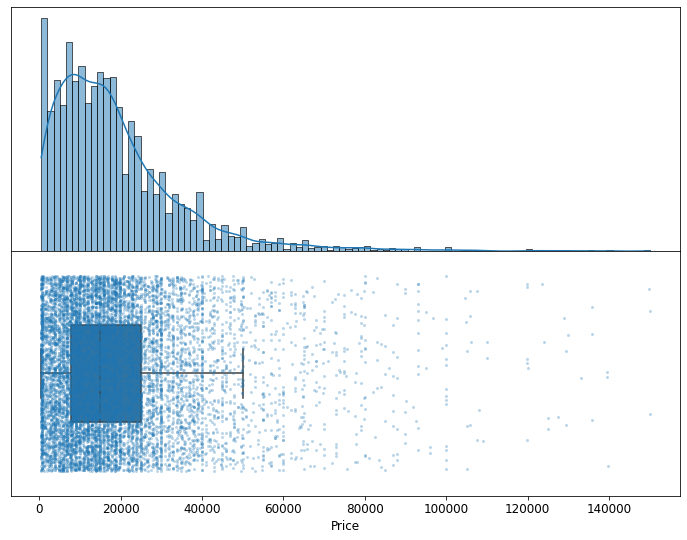

In [48]:
df = df.reset_index(drop=True)
fig, axs = plt.subplots(nrows=2)

sns.histplot(
    df["Price"],
    kde=True,
    ax=axs[0]
)

sns.stripplot(
    df["Price"], 
    orient='h',
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    df["Price"],
    orient='h',
    width=0.4, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(df["Price"]) * 0.05
xmin = np.min(df["Price"]) - spacer
xmax = np.max(df["Price"]) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].set_facecolor('white')

In [46]:

df.loc[df.Price<1000]

,Title,Seller,Price,Location,Year,Ran,Engine Type,Transmission,Body,province
44,Peugeot 206 Quicksilver 1.4XS 16v bjr2005,hydra,695,Hilversum,2005,232.500 km,NaN,NaN,NaN,Noord-Holland
251,Op Voorraad | Lynk & Co 01 | All in Private Le...,Yourlease,569,Soest,NaN,277.365 km,NaN,NaN,NaN,Utrecht
286,Opknapper Hyundai XG 30 3.0 AUT 2000 weinig km...,Patrick,950,'s-Gravenhage,2000,145.000 km,NaN,NaN,NaN,Zuid-Holland
302,Porsche Cayenne 4.8 GTS | Sport chrono | Leder...,ROS finance,626,Veenendaal,2012,162.865 km,Benzine,Automaat,SUV of Terreinwagen,Utrecht
303,Audi Q5 55 TFSI e 367PK 20INCH 3X S-LINE LUCHT...,ROS finance,879,Veenendaal,2020,32.765 km,Overige brandstoffen,Automaat,SUV of Terreinwagen,Utrecht
...,...,...,...,...,...,...,...,...,...,...
13256,Mercedes-Benz Sprinter | 319,Regeljelease.nl,763,Heel Nederland,2021,76.857 km,Diesel,Automaat,NaN,In every province
13273,SsangYong Rexton | SAPPHIRE,Regeljelease.nl,797,Heel Nederland,2022,17 km,Diesel,Automaat,NaN,In every province
13292,Mercedes-Benz Sprinter | 319 3.0 CDI V6 Aut. L2H2,Regeljelease.nl,796,Heel Nederland,2021,88.534 km,Diesel,Automaat,NaN,In every province
13321,Mercedes-Benz X-Klasse | 250 CDI,Regeljelease.nl,601,Heel Nederland,2018,92.053 km,Diesel,Automaat,NaN,In every province


Alle rows met substring lease erin eruit filteren in title seller.
niewe autos voor een hele lage prijs zijn waarschijnlijk lease dus eruit filteren
